## Import required packages.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import plot_tree, export_text
from dmba import plotDecisionTree, classificationSummary, regressionSummary
%matplotlib inline   
import matplotlib.pylab as plt

from pathlib import Path



no display found. Using non-interactive Agg backend


1. Upload, explore, clean, and preprocess data for classification tree.

a. Create the flight_df data frame by uploading the original data set into Python. Determine
and present in this report the data frame dimensions, i.e., number of rows and columns.

In [2]:
flight_df = pd.read_csv('/Users/jayasreemuchamari/Documents/Jayasreemasterstudymaterial/BAN620/Casestudy2/FlightDelays.csv')
print(flight_df.head(5))
print("Dataset dimensions:", flight_df.shape)

   SCH_TIME CARRIER  DEP_TIME DEST  DISTANCE  FL_NUM ORIGIN  WEATHER  WK_DAY  \
0      1455      OH      1455  JFK       184    5935    BWI        0       4   
1      1640      DH      1640  JFK       213    6155    DCA        0       4   
2      1245      DH      1245  LGA       229    7208    IAD        0       4   
3      1715      DH      1709  LGA       229    7215    IAD        0       4   
4      1039      DH      1035  LGA       229    7792    IAD        0       4   

   MTH_DAY FL_STATUS  
0        1    ontime  
1        1    ontime  
2        1    ontime  
3        1    ontime  
4        1    ontime  
Dataset dimensions: (2201, 11)


b. Remove ‘DEST’ and ‘ORIGIN’ variables from the flight_df data frame. Then, display the
column data types in flight_df, provide and briefly explain them in your report.

In [3]:
flight_df = flight_df.drop(columns=['DEST', 'ORIGIN'])
print(flight_df.dtypes)

SCH_TIME      int64
CARRIER      object
DEP_TIME      int64
DISTANCE      int64
FL_NUM        int64
WEATHER       int64
WK_DAY        int64
MTH_DAY       int64
FL_STATUS    object
dtype: object


c. You leave the outcome variable ‘FL_STATUS’ unchanged in flight_df. However, for the
‘CARRIER’ predictor variable, you need to convert it into the binary variables and avoid
using the Boolean (‘bool’) values. Display in Python the modified column data types,
provide and briefly explain them in your report.

In [4]:
flight_df = pd.get_dummies(flight_df, columns=['CARRIER'], drop_first=True)
# Convert all Boolean columns to integer (binary) values (0 and 1)
flight_df = flight_df.astype({
    'CARRIER_DH': 'int64', 
    'CARRIER_DL': 'int64', 
    'CARRIER_MQ': 'int64', 
    'CARRIER_OH': 'int64', 
    'CARRIER_RU': 'int64', 
    'CARRIER_UA': 'int64', 
    'CARRIER_US': 'int64'
})

# Display the modified DataFrame to verify the changes
print(flight_df.dtypes)



SCH_TIME       int64
DEP_TIME       int64
DISTANCE       int64
FL_NUM         int64
WEATHER        int64
WK_DAY         int64
MTH_DAY        int64
FL_STATUS     object
CARRIER_DH     int64
CARRIER_DL     int64
CARRIER_MQ     int64
CARRIER_OH     int64
CARRIER_RU     int64
CARRIER_UA     int64
CARRIER_US     int64
dtype: object


d. Display in Python and provide in your report the first 10 records of the modified flight_df
data frame. Briefly explain the outcome and predictors in this case.

In [5]:
flight_df.head(10)


,SCH_TIME,DEP_TIME,DISTANCE,FL_NUM,WEATHER,WK_DAY,MTH_DAY,FL_STATUS,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,1455,1455,184,5935,0,4,1,ontime,0,0,0,1,0,0,0
1,1640,1640,213,6155,0,4,1,ontime,1,0,0,0,0,0,0
2,1245,1245,229,7208,0,4,1,ontime,1,0,0,0,0,0,0
3,1715,1709,229,7215,0,4,1,ontime,1,0,0,0,0,0,0
4,1039,1035,229,7792,0,4,1,ontime,1,0,0,0,0,0,0
5,840,839,228,7800,0,4,1,ontime,1,0,0,0,0,0,0
6,1240,1243,228,7806,0,4,1,ontime,1,0,0,0,0,0,0
7,1645,1644,228,7810,0,4,1,ontime,1,0,0,0,0,0,0
8,1715,1710,228,7812,0,4,1,ontime,1,0,0,0,0,0,0
9,2120,2129,228,7814,0,4,1,ontime,1,0,0,0,0,0,0


2.  Develop a classification tree for the Flight Delays case.

a. Develop in Python the predictor variables (14 variables) and outcome variable
(‘FL_STATUS’), partition the data set (80% for training and 20% for validation partitions).
Train a classification tree model using DecisionTreeClassifier() with the training data set
and the following tree control parameters: (a) maximum depth (number of splits) equals
4; (b) minimum impurity decrease per split of 0.001; and (c) minimum number of node
records (samples) to split equals to 30. Use plotDecisionTree() with the feature_names
and class_names parameters to display the classification tree in Python and present it in
your report.

Classes: delayed, ontime

Classification Tree after First Split


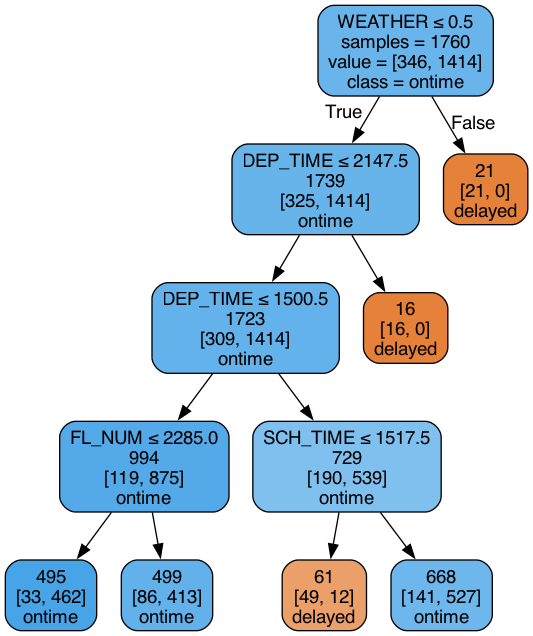

In [6]:
# Develop predictors X and output variable Y for the data set.
X = flight_df.drop(columns=['FL_STATUS'])
y = flight_df['FL_STATUS']

# Develop training (80%) and validation(20%) partitions for
# Flight data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize the DecisionTreeClassifier with the specified parameters
classFlightTree = DecisionTreeClassifier(
    random_state=0, 
    max_depth=4, 
    min_impurity_decrease=0.001, 
    min_samples_split=30
)

# Train the classification tree model on the training data
classFlightTree.fit(train_X, train_y)
print("Classes: {}".format(', '.join(classFlightTree.classes_)))

#plotDecisionTree(classFlightTree, feature_names=flight_df.drop(columns=['FL_STATUS']).columns, class_names=classFlightTree.classes_)

print()
print('Classification Tree after First Split')
plotDecisionTree(
    classFlightTree, 
    feature_names=X.columns,  # Use X.columns to get the column names for the predictors
    class_names=classFlightTree.classes_
)

b. Using the classification tree, explain the outcome (‘FL_STATUS’) of a flight if the weather
(‘WEATHER’) is in good flying condition, departure time (‘DEP_TIME’) is 1450 (2:50 pm),
and scheduled time (‘SCH_TIME’) is 1435 (2:35 pm).

c. Identify and display in Python confusion matrices for training and validation partitions.
Present them in your report and comment on accuracy (misclassification) rate for both
partitions and explain if there is a possibility of overfitting.

In [7]:

# Regression tree accuracy measures for training and
# validation partitions. 

# Identify and display regression tree accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Regression Tree')
train_value = classificationSummary(train_y, classFlightTree.predict(train_X))
print(train_value)
# Identify and display regression tree accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Regression Tree')
validation_accuracy = classificationSummary(valid_y, classFlightTree.predict(valid_X))
print(validation_accuracy)


Accuracy Measures for Training Partition for Regression Tree
Confusion Matrix (Accuracy 0.8455)

       Prediction
Actual    0    1
     0   86  260
     1   12 1402
None

Accuracy Measures for Validation Partition for Regression Tree
Confusion Matrix (Accuracy 0.8594)

       Prediction
Actual   0   1
     0  26  56
     1   6 353
None


d. Using the trained classification tree, make classification of flight status (‘delayed’ or
‘ontime’) for the following two new flight records:

In [8]:
#Testing tained classification tree with new data
new_flight_data = pd.DataFrame({
    'SCH_TIME': [2150, 1510],
    'DEP_TIME': [2148, 1515],
    'DISTANCE': [358, 299],
    'FL_NUM': [7812, 6155],
    'WEATHER': [0, 0],
    'WK_DAY': [1, 6],
    'MTH_DAY': [20, 30],
    'CARRIER_DH': [0, 0],
    'CARRIER_DL': [0, 0],
    'CARRIER_MQ': [1, 0],
    'CARRIER_OH': [0, 0],
    'CARRIER_RU': [0, 0],
    'CARRIER_UA': [0, 1],
    'CARRIER_US': [0, 1]
})
# Make classifications for new data. 
pred_new_data = classFlightTree.predict(new_flight_data)

# Display new data and classifications based on 
#for new data.
pred_result = pd.DataFrame({
                'SCH_TIME': [2150, 1510],
                'DEP_TIME': [2148, 1515],
                'DISTANCE': [358, 299],
                'FL_NUM': [7812, 6155],
                'WEATHER': [0, 0],
                'WK_DAY': [1, 6],
                'MTH_DAY': [20, 30],
                'CARRIER_DH': [0, 0],
                'CARRIER_DL': [0, 0],
                'CARRIER_MQ': [1, 0],
                'CARRIER_OH': [0, 0],
                'CARRIER_RU': [0, 0],
                'CARRIER_UA': [0, 1],
                'CARRIER_US': [0, 1],
                'FL_STATUS' : pred_new_data
})

print()
print('New Riding Mowers Data and Classifications for New Data')
print(pred_result)


New Riding Mowers Data and Classifications for New Data
   SCH_TIME  DEP_TIME  DISTANCE  FL_NUM  WEATHER  WK_DAY  MTH_DAY  CARRIER_DH  \
0      2150      2148       358    7812        0       1       20           0   
1      1510      1515       299    6155        0       6       30           0   

   CARRIER_DL  CARRIER_MQ  CARRIER_OH  CARRIER_RU  CARRIER_UA  CARRIER_US  \
0           0           1           0           0           0           0   
1           0           0           0           0           1           1   

  FL_STATUS  
0   delayed  
1   delayed  


3. Apply grid search to improve classification results.

a. Use the GridSearchCV() algorithm in Python to improve (optimize) the classification tree
control parameters. Consider the following control parameters: (a) maximum depth
(number of splits) in the range from 2 to 30; (b) minimum impurity decrease per split of
0, 0.0005, and 0.001; and (c) minimum number of node records (samples) to split in the
range from 5 to 30. Do not use the initial guess grid search, and directly apply the
improved grid search. Provide in your report the improved parameters and display in
Python the associated classification tree. Display the confusion matrices for training and
validation partitions for the improved classification tree.

In [9]:
# Start with initial guess for parameters.
param_grid = {
   'max_depth': range(2, 31),  
    'min_impurity_decrease': [0, 0.0005, 0.001],  
    'min_samples_split': range(5, 31) 
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() initial parameters. cv=5 means that
# 5-fold cross-validation is used in this case, and n_jobs=-1 
# means that the availalbe computer memory (CPU) will be 
# used to make calculations faster. 
gridSearch_init = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid, cv=5, n_jobs=-1)
gridSearch_init.fit(train_X, train_y)
# Display best initial paramenters of classification tree. 
print(f'best score:{gridSearch_init.best_score_:.4f}')
#print('best parameters: ', gridSearch_init.best_params_)
best_params_str = (
    f"Best max_depth: {gridSearch_init.best_params_['max_depth']}, "
    f"min_impurity_decrease: {gridSearch_init.best_params_['min_impurity_decrease']}, "
    f"min_samples_split: {gridSearch_init.best_params_['min_samples_split']}"
)
print("Best Parameters:\n", best_params_str)


best score:0.8858
Best Parameters:
 Best max_depth: 9, min_impurity_decrease: 0.001, min_samples_split: 20


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Improved Flight Delays Classification Tree


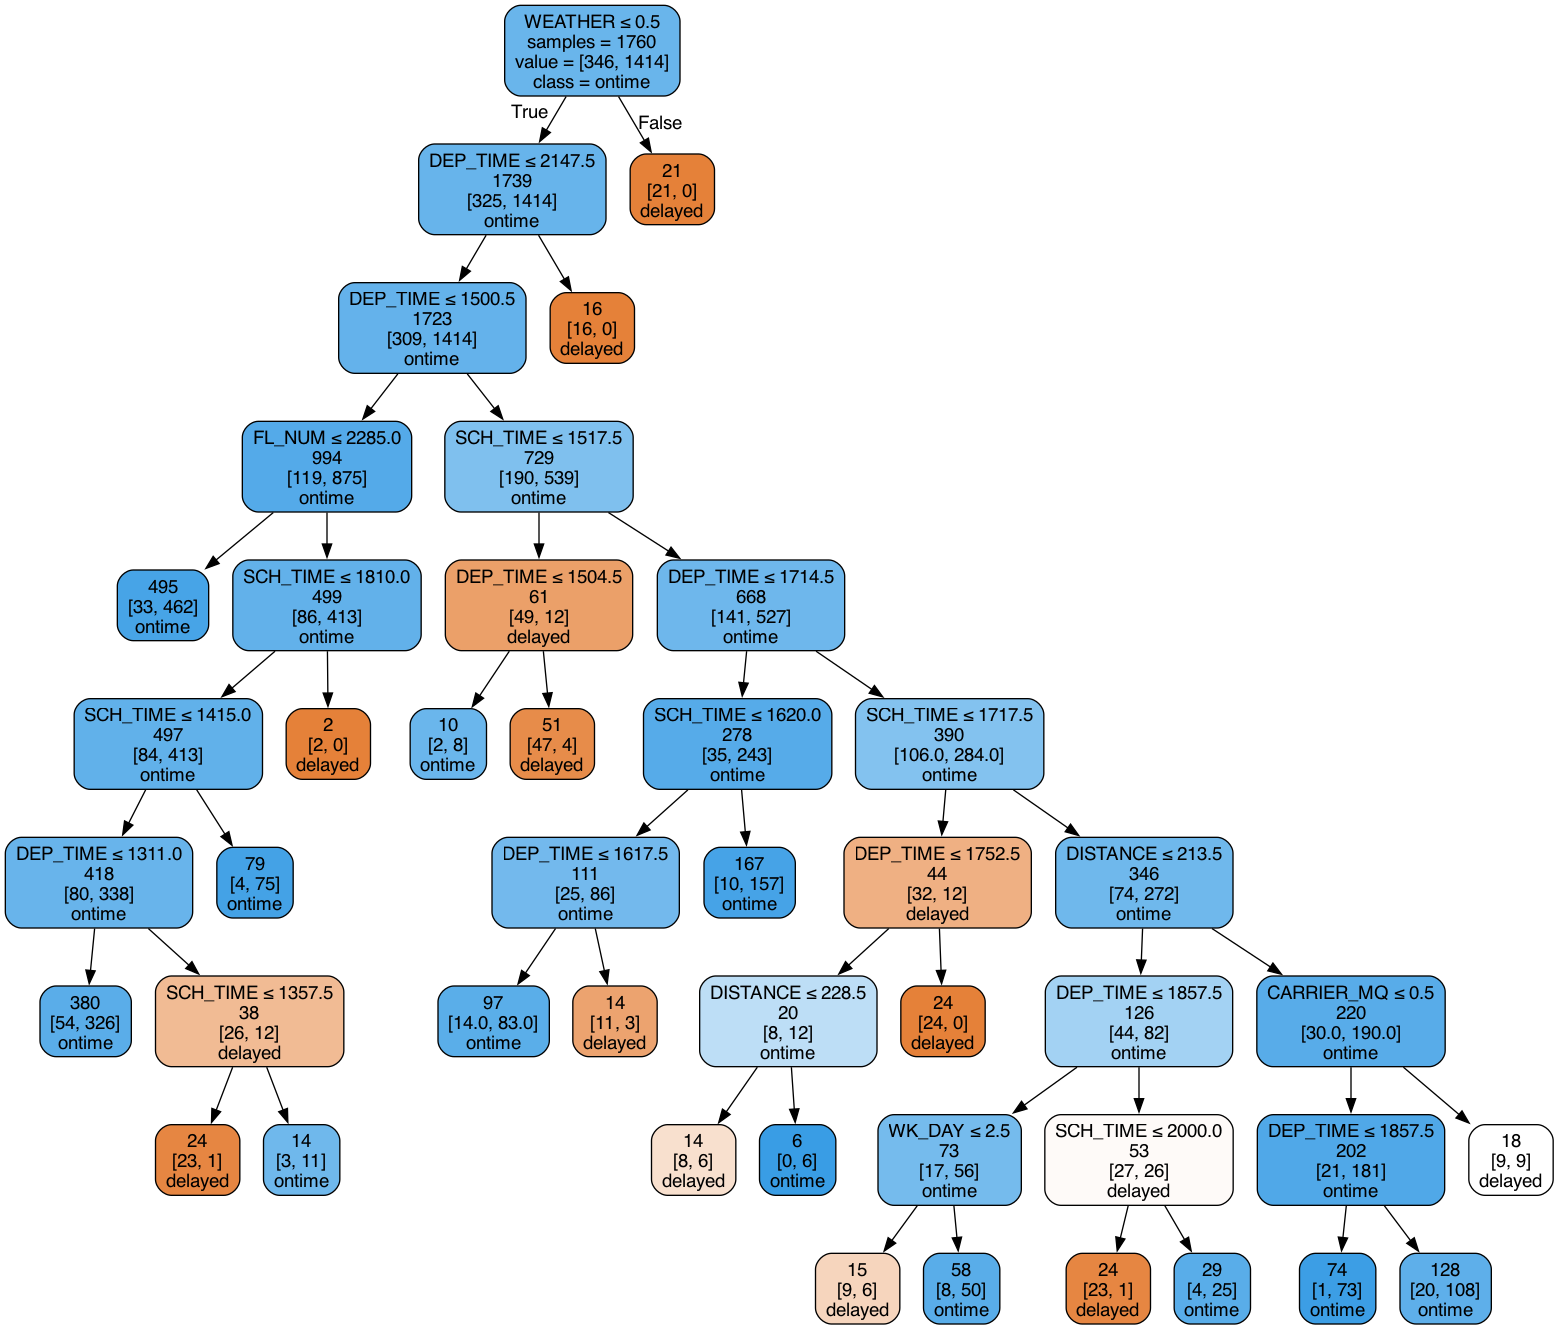

In [10]:
# Plot the decision tree using sklearn's plot_tree function
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch_init.best_estimator_
#plt.figure(figsize=(20, 10))
print("Improved Flight Delays Classification Tree")
plotDecisionTree(bestClassTree, feature_names=X.columns, class_names=bestClassTree.classes_)




In [11]:
# Indetify and display number of nodes in the tree
# based on grid search.
tree_nodes_grid = bestClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)
# Check the depth of the tree for the trained model
print("Tree Depth:", bestClassTree.get_depth())

Number of nodes: 45
Tree Depth: 9


In [12]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.8960)

       Prediction
Actual    0    1
     0  193  153
     1   30 1384

Validation Partition
Confusion Matrix (Accuracy 0.8685)

       Prediction
Actual   0   1
     0  42  40
     1  18 341


b. Present and compare in your report the validation confusion matrices for the
classification results in questions 2c and 3a. Using the accuracy value (misclassification
rate), which classification tree model would you recommend using for making predictions
in this case of flight status (‘delayed’ or ‘ontime’)? Briefly explain your answer.